# Rekha Meena
# @The Sparks Foundation
## Data Science & Business Analytics Intern
# Task-5 : Exploratory Data Analysis - Sports


## Problem Statement :
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.


● Dataset: https://bit.ly/34SRn3b



# Let's get started !!!
Importing the required libraries for EDA

In [1]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Loading the data into the data frame.

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
pal = sns.color_palette("rainbow", 10)
sns.set_palette(pal)


In [74]:
df_matches = pd.read_csv("matches.csv")
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df_matches.shape

(756, 18)

In [5]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
df_matches.drop(['id', 'dl_applied','umpire1', 'umpire2','umpire3'], axis=1, inplace=True)

In [11]:
df_matches.columns

Index(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

In [14]:
df_matches.isna().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

#### Observation : city =7, winner=4, player_of_match =4

In [13]:
df_matches[df_matches.isnull().any(axis=1)]

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,NaN,0,0,NaN,Feroz Shah Kotla
461,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,NaN,0,0,NaN,M Chinnaswamy Stadium
570,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,NaN,0,0,NaN,M Chinnaswamy Stadium


In [15]:
df_matches.city.fillna('Dubai',inplace=True)
df_matches.winner.fillna('Match Cancelled',inplace=True)
df_matches.player_of_match.fillna('Match Cancelled',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Gujarat Lions'),
  Text(10, 0, 'Pune Warriors'),
  Text(11, 0, 'Delhi Capitals'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Kochi Tuskers Kerala'),
  Text(14, 0, 'Rising Pune Supergiants'),
  Text(15, 0, 'Match Cancelled')])

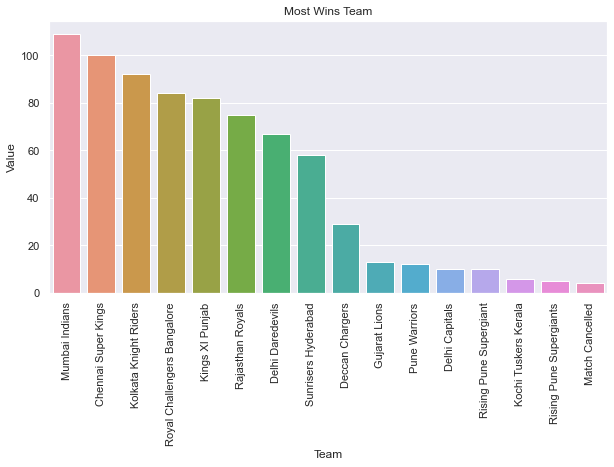

In [22]:
a=df_matches["winner"]
c=a.value_counts()
b=pd.DataFrame({'Team':c.index,'Value':c.values})

plt.figure(figsize=(10,5))
sns.barplot(b["Team"],b["Value"])
plt.title("Most Wins Team")
plt.xticks(rotation=90)

In [90]:
df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13')])

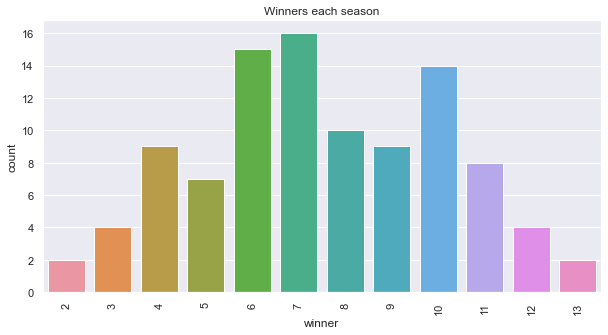

In [89]:
plots= df_matches.groupby('season')['winner'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(plots)
plt.title("Winners each season")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'MS Dhoni'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'RG Sharma'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'V Kohli'),
  Text(10, 0, 'AM Rahane'),
  Text(11, 0, 'MEK Hussey'),
  Text(12, 0, 'A Mishra'),
  Text(13, 0, 'V Sehwag'),
  Text(14, 0, 'DR Smith'),
  Text(15, 0, 'AD Russell'),
  Text(16, 0, 'JH Kallis'),
  Text(17, 0, 'KA Pollard'),
  Text(18, 0, 'SP Narine'),
  Text(19, 0, 'SE Marsh')])

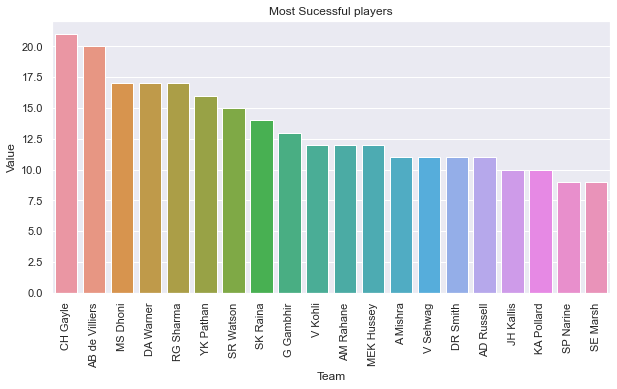

In [23]:
a=df_matches["player_of_match"]
c=a.value_counts().head(20)
b=pd.DataFrame({'Team':c.index,'Value':c.values})

plt.figure(figsize=(10,5))
sns.barplot(b["Team"],b["Value"])
plt.title("Most Sucessful players")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Most Toss Winners')

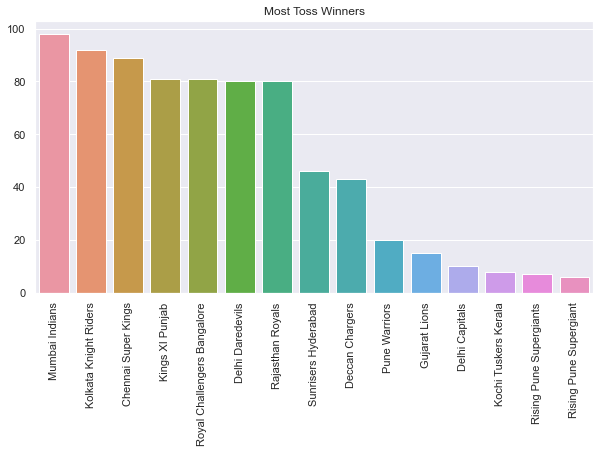

In [24]:
a=df_matches['toss_winner']
b=a.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(b.index,b.values)
plt.xticks(rotation=90)
plt.title("Most Toss Winners")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Rising Pune Supergiant'),
  Text(1, 0, 'Kolkata Knight Riders'),
  Text(2, 0, 'Kings XI Punjab'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

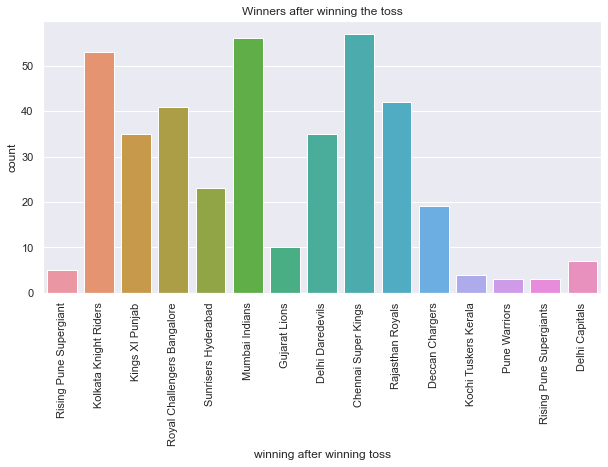

In [25]:
a=df_matches['winner']
b=df_matches['toss_winner']
c=a==b
d=pd.DataFrame({'winning after winning toss':a,'true/false':c})
e=d['winning after winning toss']
f=d['true/false']==True
g=e[f]
plt.figure(figsize=(10,5))
sns.countplot(g)
plt.title("Winners after winning the toss")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RG Sharma'),
  Text(1, 0, 'KA Pollard'),
  Text(2, 0, 'SR Tendulkar'),
  Text(3, 0, 'AT Rayudu'),
  Text(4, 0, 'Harbhajan Singh')])

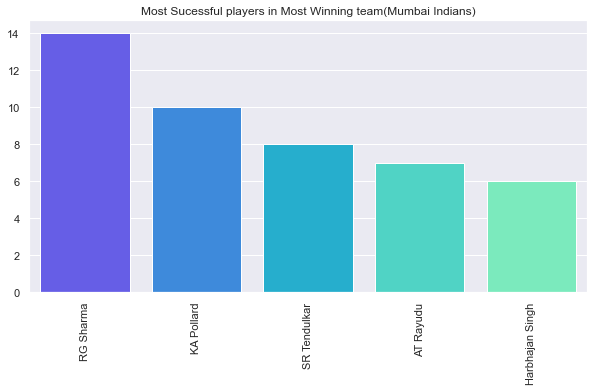

In [29]:
a=df_matches['winner']=='Mumbai Indians'
b=df_matches['player_of_match']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Most Sucessful players in Most Winning team(Mumbai Indians)")
plt.xticks(rotation=90)

In [30]:
bat_first=df_matches[df_matches['win_by_runs']!=0]
bat_first.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
8,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
13,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens
14,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla


Text(0.5, 1.0, 'Winner after batting first')

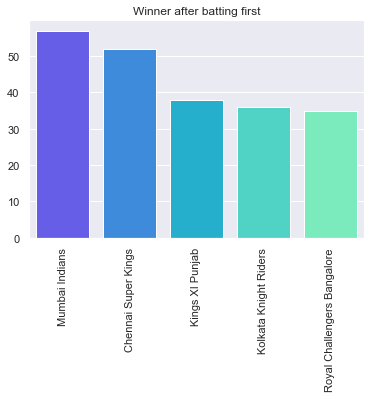

In [31]:
a=bat_first['winner'].value_counts().head()
sns.barplot(a.index,a.values)
plt.xticks(rotation=90)
plt.title('Winner after batting first')

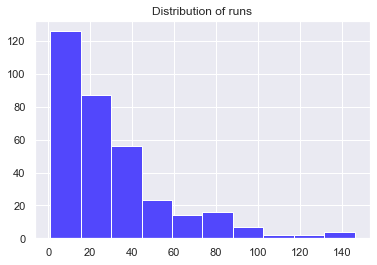

In [32]:
a=bat_first['win_by_runs']
plt.hist(a)
plt.title('Distribution of runs')
plt.show()

In [33]:
ball_first=df_matches[df_matches['win_by_wickets']!=0]
ball_first.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4,N Rana,Wankhede Stadium


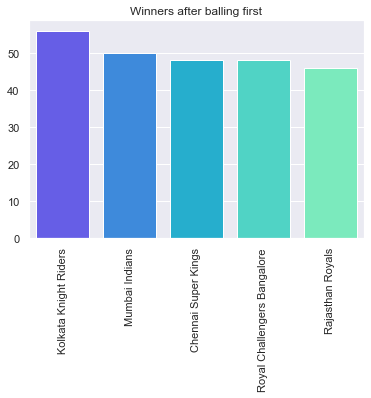

In [34]:
a=ball_first['winner'].value_counts().head()
sns.barplot(a.index,a.values)
plt.title('Winners after balling first')
plt.xticks(rotation=90)
plt.show()

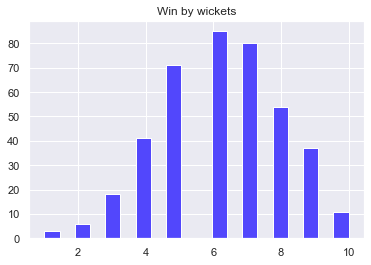

In [35]:
a=ball_first['win_by_wickets']
plt.hist(a,bins=20)
plt.title('Win by wickets')
plt.show()

In [45]:
df_deliveries = pd.read_csv(r'deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [80]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


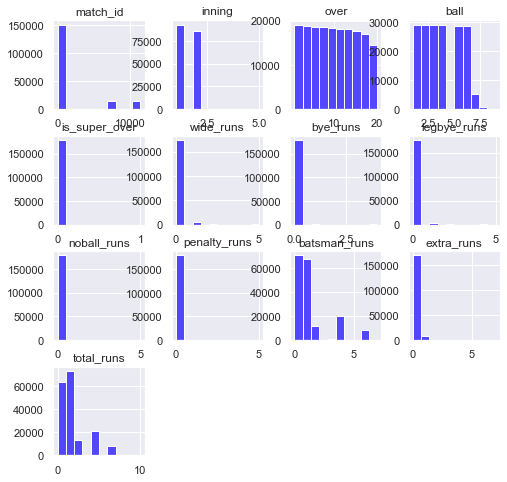

In [85]:
df_deliveries.hist(bins=10,figsize=(8,8))
plt.show()

Text(0.5, 1.0, 'Most played batsman')

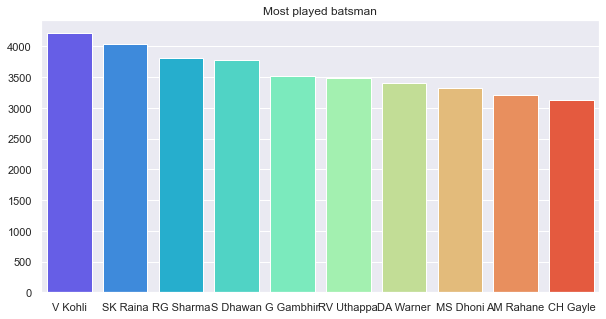

In [38]:
a=df_deliveries['batsman'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Most played batsman")

Text(0.5, 1.0, 'most played bowlers')

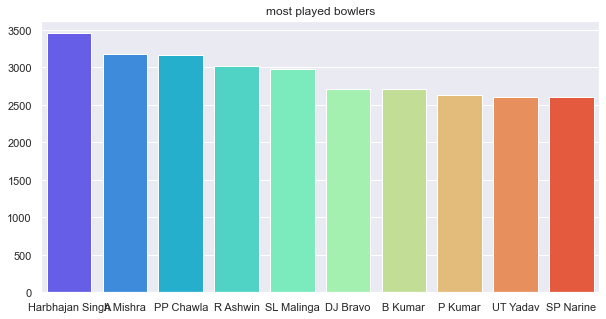

In [39]:
a=df_deliveries['bowler'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("most played bowlers")

Text(0.5, 1.0, 'Players with most sixes')

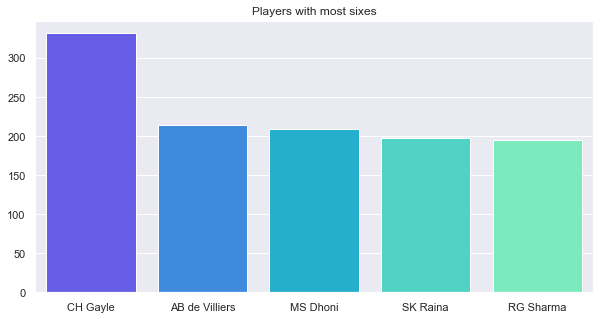

In [40]:
a=df_deliveries['total_runs']>=6
b=df_deliveries['batsman']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(c.index,c.values)
plt.title("Players with most sixes")

In [48]:
df_deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

(array([], dtype=float64), [])

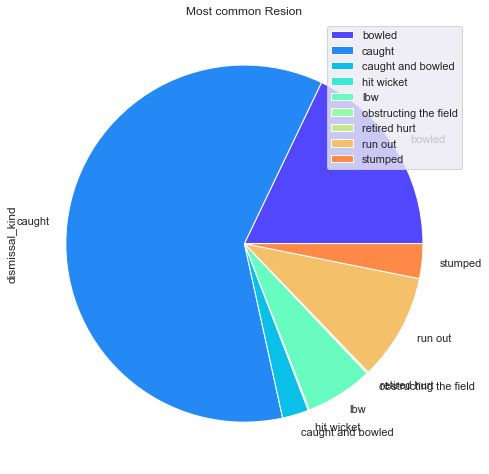

In [61]:
a = df_deliveries.groupby('dismissal_kind')['dismissal_kind'].count()
plt.figure(figsize = (8,15))
plt.title("Most common Resion")
a.plot(kind='pie')
plt.legend()
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'bowlers who took most wickets'}>

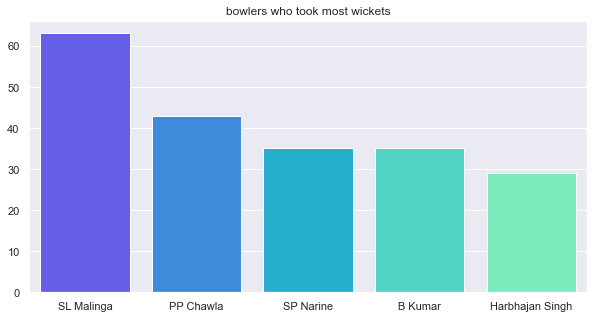

In [41]:
a=df_deliveries['dismissal_kind']=='bowled'
b=df_deliveries['bowler']
c=b[a].value_counts().head()
plt.figure(figsize=(10,5))
plt.title("bowlers who took most wickets")
sns.barplot(c.index,c.values)

Text(0.5, 1.0, 'Filders with most catches')

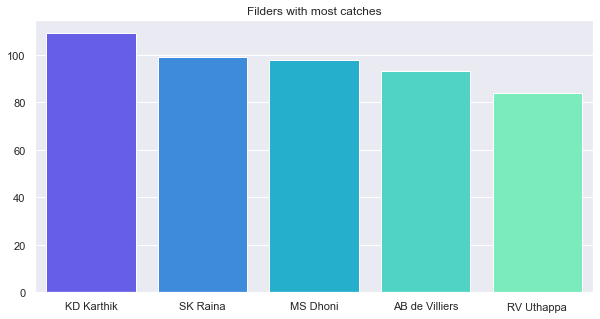

In [42]:
a=df_deliveries['dismissal_kind']=='caught'
b=df_deliveries['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Filders with most catches")

Text(0.5, 1.0, 'Fielders who took most wickets')

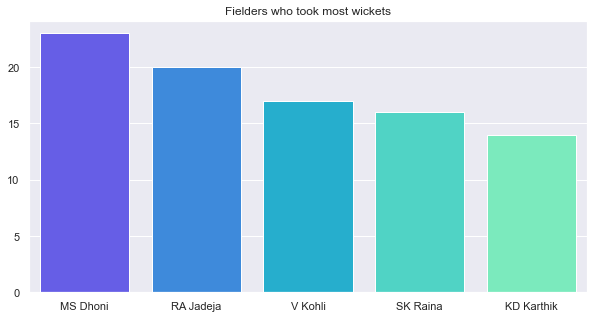

In [43]:
a=df_deliveries['dismissal_kind']=='run out'
b=df_deliveries['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title("Fielders who took most wickets")

Text(0.5, 1.0, 'Fielders who stumped most')

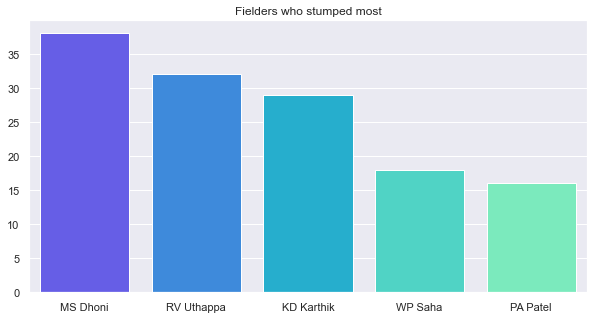

In [44]:
a=df_deliveries['dismissal_kind']=='stumped'
b=df_deliveries['fielder']
c=b[a]
d=c.value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(d.index,d.values)
plt.title('Fielders who stumped most')


# Observation : 
- Most Sucessful teams are Mumbai Indians followed by Chennai Super Kings and Kolkata Knight Riders
- Most Sucessful playes are CH Gayle, AB de Villiers, SL Malinga, PP Chawla, KD Kartik, MS Dhoni
- 